# Elastic Properties

Post-processing and visualization of CRYSTAL output by keyword 'ELASCON'.

## 'crystal_io.Crystal_output.get_elatensor()' method
Get output objects.

In [1]:
from CRYSTALpytools.crystal_io import Crystal_output

e1d = Crystal_output('elastic1D_Ctube.out')
e2d = Crystal_output('elastic2D_graphene.out')
e3d = Crystal_output('elastic3D_ZIF8_P0.out')

Dimensionality:

- 3D: 6\*6 stiffness tensor in Voigt representation. Unit: GPa.  
- 2D: 3\*3 stiffness tensor in Voigt representation. The standard periodic boundary condition of CRYSTAL is used (xy periodic). Unit: GPa, GPa.m if effective thickness is not available.  
- 1D: 1\*1 Hook constant. Unit: GPa, GPa.m$^{2}$ if effective thickness is not available. Either 1 or 2 effective thickness can be set.

It is important to set the effective thickness of 2D and 1D materials. Otherwise extra length dimensions are added to the unit of output data, which might lead to very small numbers.

Here we use 1.02 nm for graphene (Cameron J Shearer *et al* 2016 *Nanotechnology* **27** 125704) and diameter of carbon nanotube, 4.91 Angstrom.

In [2]:
print('1D:')
print(e1d.get_elatensor(4.91))
print('2D:')
print(e2d.get_elatensor(10.2))
print('3D:')
print(e3d.get_elatensor())

1D:
[[1102.99673119]]
2D:
[[367.66453611  80.60874625   0.        ]
 [ 80.60874625 367.66453611   0.        ]
 [  0.           0.         143.56893808]]
3D:
[[12.076  9.273  9.273  0.     0.     0.   ]
 [ 9.273 12.076  9.273  0.     0.     0.   ]
 [ 9.273  9.273 12.076  0.     0.     0.   ]
 [ 0.     0.     0.     1.213  0.     0.   ]
 [ 0.     0.     0.     0.     1.213  0.   ]
 [ 0.     0.     0.     0.     0.     1.213]]


## 'elastics' module

The elastics module is developed in the object-oriented way. It contains plotting and manipulation functions.

**NOTE** Not available to 1D and 0D systems.

### Instantiation
2 instantiation methods are given: from wrapper function `tensor_from_file()` or directly calling class method `Tensor2D.from_file()`.

In [3]:
from CRYSTALpytools.elastics import *

t3d = tensor_from_file('elastic3D_ZIF8_P0.out', conventional_lattice=True)
t2d = Tensor2D.from_file('elastic2D_graphene.out', thickness=10.2)

print('3D tensor: ', type(t3d))
print('2D tensor: ', type(t2d))

3D tensor:  <class 'CRYSTALpytools.elastics.Tensor3D'>
2D tensor:  <class 'CRYSTALpytools.elastics.Tensor2D'>


### Analysis

Available properties include:

- Young's modulus  
- Linear compressibility  
- Shear modulus (in-plane, averaged, max, min)  
- Poisson ratio (in-plane, averaged, max, min)

For details, please refer to module-specific documentations. 

Get Young's modulus (GPa) along \[0 1 1\] and \[0 1 0\] directions:

In [4]:
print(t3d.get_1D('young', [[0, 1, 1], [0, 1, 0]], use_cartesian=False))

[3.61734169 4.02049117]


Get averaged Poisson ratio on the plane perpendicular to \[1 0 0\] direction:

In [5]:
print(t3d.get_1D('poisson avg', [1, 0, 0], use_cartesian=False))

0.43435289709119884


Get shear modulus (GPa) between \[1 0 0\] and \[0 0 1\]:

In [6]:
print(t3d.get_pair('shear', [1, 0, 0], [0, 0, 1], use_cartesian=False))

1.213


## Plot

For 3D systems, the user can plot 3D surface of elastic properties and 2D loops on lattice planes. Vectors along specific directions can be annotated.

For 2D systems, the user can plot 2D loops on the \[0 0 1\] surface. Vectors along specific directions can be annotated.

For details, please refer to module-specific documentations.

### 3D surface plot

Plot Young's modulus on a sphere. Lattice is added to indicate the orientation.

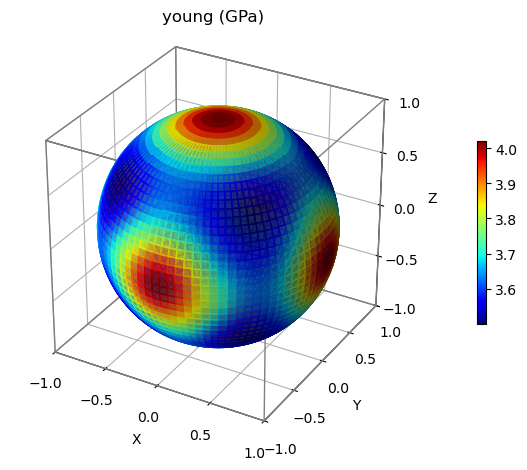

In [7]:
# %matplotlib widget # Uncomment this line if you have widget installed
fig = t3d.plot_3D('young', scale_radius=False, plot_lattice=True, plot_lib='matplotlib')

If the ``%matplotlib widget`` is not available, or you are simply tired of matplotlib, plotly is used to generate interactive 3D plots. But this option is only available for 3D plots.

Sphere radius is scaled by elastic properties. Vectors are added to indicate the maximum and minimum directions of averaged shear modulus. Note that for plotly, the same `figsize` input in inch is used. A resolution of 300 ppi is assumed (i.e., in the following example, figure size in pixel is 600\*600)

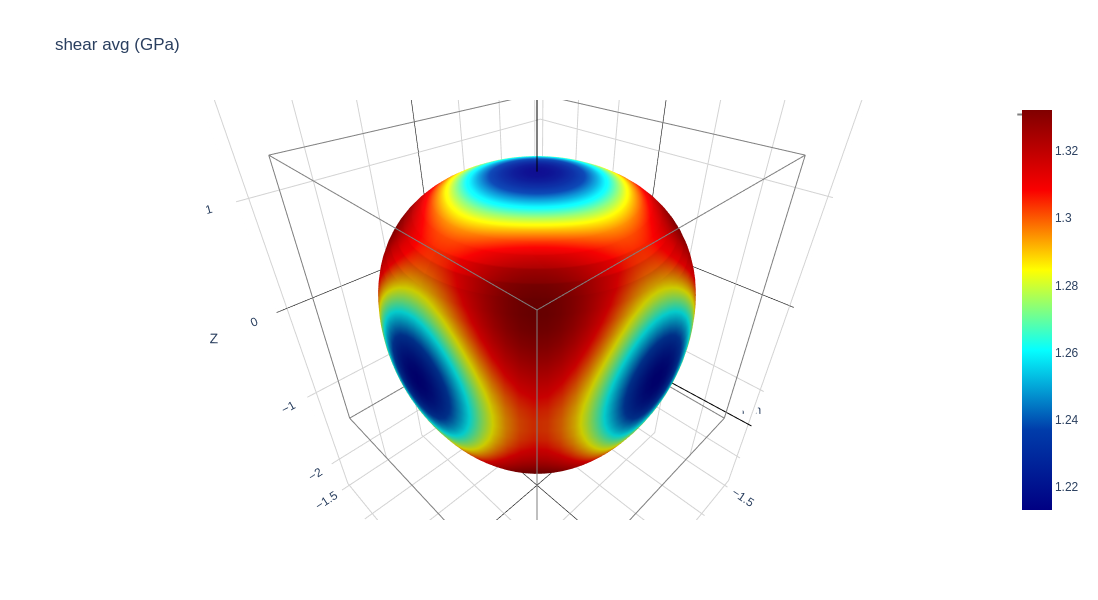

In [8]:
fig = t3d.plot_3D('shear avg', scale_radius=True, u='bothends', utext=['max', 'min'],
                  plot_lattice=True, figsize=[2, 2], plot_lib='plotly')
fig.show()

### 2D pole charts

Pole charts are useful to study the cross-section of 3D systems, or elastic properties of 2D systems.

Plot Young's and the avarge of in-plane shear moduli on the \(1 1 1\) and \(0 1 0\) planes of ZIF8. The default layout is nProp\*nPlane, which is not editable.

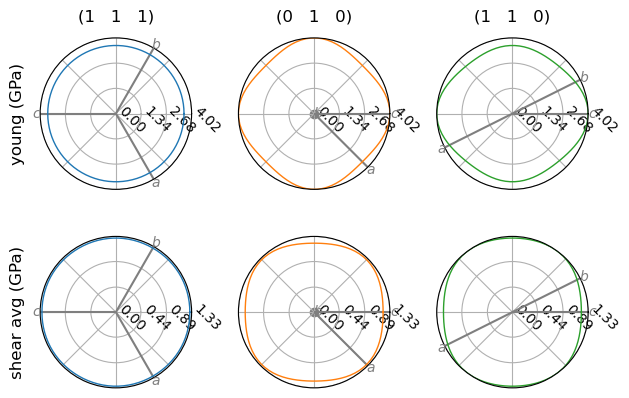

In [9]:
fig = t3d.plot_2D(['young', 'shear avg'],
                  plane=[[1, 1, 1], [0, 1, 0], [1, 1, 0]],
                  plane_definition='miller')

Note that lattice vectors are annotated to indicate the orientations.

Plot the Young's modulus of graphene and annotate the vector along \[1 1\] direction. Here 'poisson' and 'shear' refer to the in-plane Poisson and shear modulus, which are computed by 2 vectors perpendicular to each other and in the \(0 0 1\) plane. The default layout is 1\*nProp.

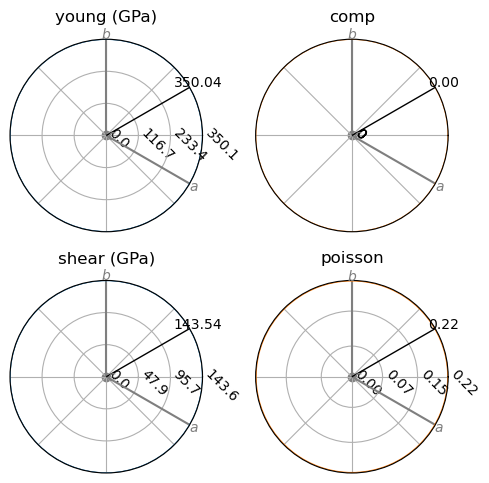

In [10]:
fig = t2d.plot_2D(['young', 'comp', 'shear', 'poisson'], layout=[2, 2],
                  u=[1,1], utext='value', use_cartesian=False, figsize=[5, 5])

## 'plot.plot_elastics3D()' and 'plot.plot_elastics2D()' functions

These 2 functions offer a higher-level of control, which enables plotting multiple properties based on multiple tensors for comparison. Only matplotlib is used for plotting.

### Collection of 3D plots

The `plot_elastics3D()` method gets a figure of subplots, with default layout of nTensor\*nProperty, or 1\*nTensor if only 1 property is specified.

Plot Young's modulus of ZIF8 under pressures and annotate the max values.

The `plot_lattice` option plots the unit cell of arbitrary size to indicate the orientation. With `uniform_scale=True`, the unit cell, as well as the plot scale, is kept constant for comparison.

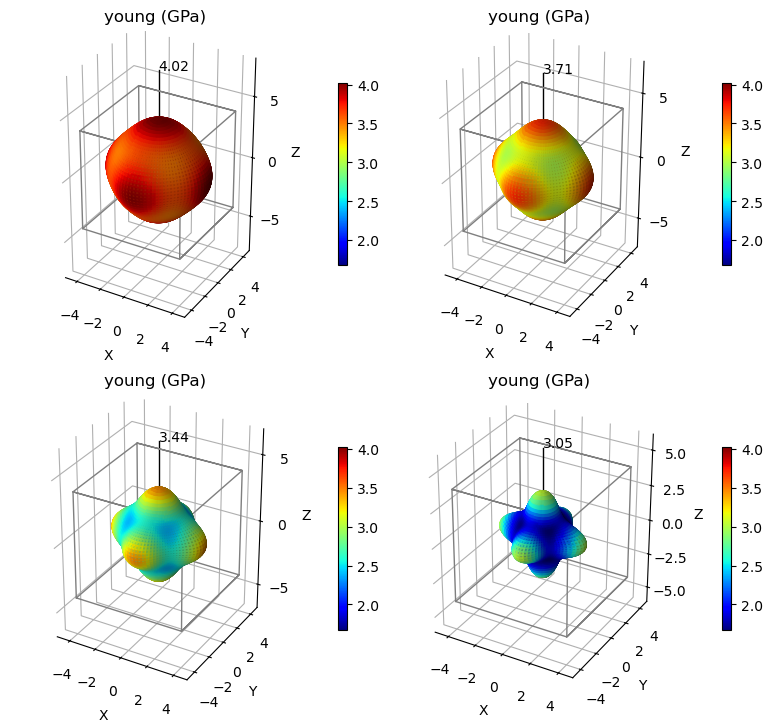

In [11]:
from CRYSTALpytools.plot import plot_elastics3D

figs = plot_elastics3D('elastic3D_ZIF8_P0.out', 'elastic3D_ZIF8_P01.out',
                       'elastic3D_ZIF8_P02.out', 'elastic3D_ZIF8_P03.out',
                       property='young', u='max', utext='value', plot_lattice=True,
                       layout=[2, 2], figsize=[8, 8], range_x=[-5, 5], range_y=[-5, 5])

### Poisson Ratio

Compare different mechanical properties of the same system and annotate the maximum value.

/tmp/ipykernel_27932/479534621.py:3: UserWarning: 'uniform_scale' cannot be used for multiple proeprties of the same system. Using 'uniform_scale = False'.
  figs = plot_elastics3D('elastic3D_ZIF8_P04.out', figsize=[10, 7.5],


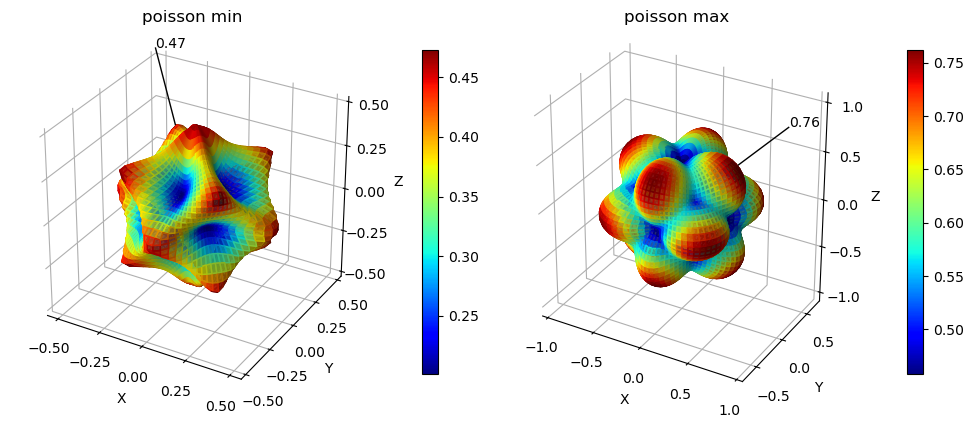

In [1]:
from CRYSTALpytools.plot import plot_elastics3D

figs = plot_elastics3D('elastic3D_ZIF8_P04.out', figsize=[10, 7.5],
                       property=['poisson min', 'poisson max'], u='max',
                       utext='value', plot_lattice=False)

### Collection of 2D plots

The 'plot_elastics2D' option can be used for either 3D or 2D systems.

When multiple systems are used, it maintains the layout of `Tensor3D.plot_2D` and `Tensor2D.plot_2D` class methods and plots loops of different materials into the same axis. In this case, the `u` and `utext` options are disabled.

Plot the out-of-plane (i.e., with respect to the plane norm) shear moduli and Poisson ratio on the \(1 0 0\), \(1 1 0\) and \(1 1 1\) planes of ZIF8 under different pressures.

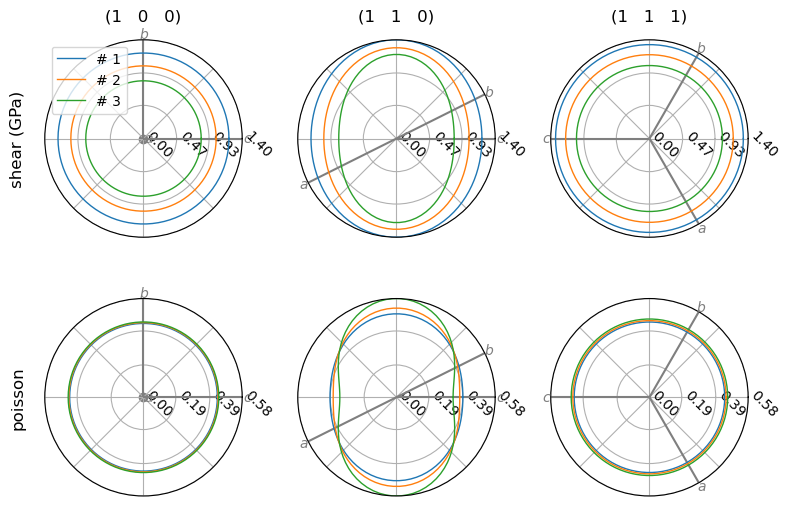

In [13]:
from CRYSTALpytools.plot import plot_elastics2D

figs = plot_elastics2D(
    'elastic3D_ZIF8_P0.out', 'elastic3D_ZIF8_P01.out', 'elastic3D_ZIF8_P02.out',
    property=['shear', 'poisson'], plane=[[1, 0, 0], [1, 1, 0], [1, 1, 1]],
    plane_definition='miller', figsize=[8, 6])

For the 2D graphene, plot all the properties.

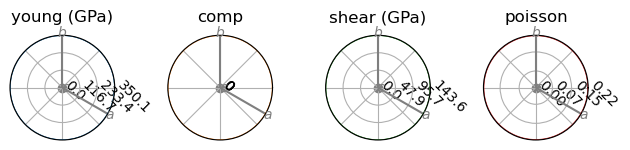

In [14]:
figs = plot_elastics2D(t2d, property=['young', 'comp', 'shear', 'poisson'])

Boring isotropic figures :-)

Do remember to check the odule-specific documentations.